In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [12]:
labeled_data = "/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Batchcorrected_Labeled_Data_Only.csv"
gene_exp_df_labeled = pd.read_csv(labeled_data)

study_name_list = []
for name in gene_exp_df_labeled.columns:
    study_name_list.append(name.split(';')[-1])
# print(len(study_name_list))

gene_exp_df_transposed = gene_exp_df_labeled.T
# print(gene_exp_df_transposed.shape)
tsne = TSNE(n_components=2, random_state=0)
gene_exp_2d = tsne.fit_transform(gene_exp_df_transposed)

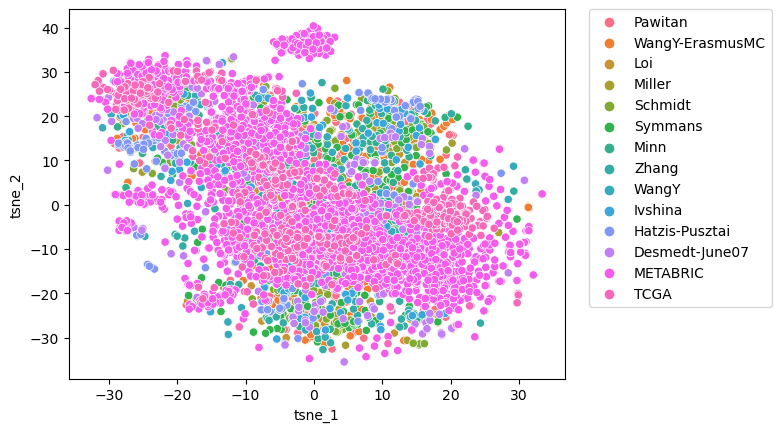

In [13]:
gene_exp_2d_df = pd.DataFrame({'tsne_1': gene_exp_2d[:,0], 'tsne_2': gene_exp_2d[:,1], 'label':study_name_list})
fig, ax = plt.subplots()
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=gene_exp_2d_df, ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.0)
plt.show()
# plt.savefig("output.png", bbox_inches="tight")